In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.1 MB


Till this point we:
1. Import our train dataset.
2. Desribe the data and got to know that the price exists majorly in 75% quartile that is greater that of median.
3. By information about data we get to know except price (int64) all are object data types and , route and total stops have one null  values which we have to deaal with.
4. Memory usage including the columns value is 9.2 mb.


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data[data['Route'].isnull()] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
#deleting the rows having na values
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


Till now we:
1. Route and Total_stops haveonly one missing value so we can remove it.
2. Our new dataset contains 10682*11 count.

In [11]:
#making copy so that our true dataset do not change
df=data.copy()

In [12]:
#converting the date of journey,dep time and arrival time in timestamp form
def change(col):
    df[col]=pd.to_datetime(df[col])

In [13]:
#to ignore the warnings coming
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [14]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change(i)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [16]:
#now determining the day month and year 
df['day']=df['Date_of_Journey'].dt.day
df['day'].head(4)

0    24
1     1
2     9
3    12
Name: day, dtype: int32

In [17]:
df['month']=df['Date_of_Journey'].dt.month
df['month'].head(4)

0    3
1    5
2    6
3    5
Name: month, dtype: int32

In [18]:
df['year']=df['Date_of_Journey'].dt.year
df['year'].head(4)

0    2019
1    2019
2    2019
3    2019
Name: year, dtype: int32

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-22 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-22 05:50:00,2024-05-22 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-22 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-05-22 18:05:00,2024-05-22 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-05-22 16:50:00,2024-05-22 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


Till now we:
1. Convert the date of journey, arrival and departure time in timestamp.
2. Extract day, month and year from the date of journey.

In [20]:
#to change the dept time and arrival time in minutes and hours
def extract(col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute

In [21]:
for i in ['Dep_Time','Arrival_Time']:
    extract(i)
    df.drop(i,axis=1,inplace=True)
   

In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


Till now we:
1. Extract the hour and minute of departure and arrival.
2. Make new columns and store in the value.
3. Drop the values of arrival and dept time

In [23]:
#data analysis : showing how many flights take off during early morning,morning,day or night
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'day', 'month',
       'year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [24]:
#we can get it using departure time hour
def time_of_day(x):
    if x>=4 and x<=8:
        return "Early Morning"
    elif x>8 and x<=12:
        return "Morning"
    elif x>12 and x<=16:
        return "Afternoon"
    elif x>16 and x<=20:
        return "Evening"
    elif x>20 and x<=24:
        return "Night"
    else:
        return "Late Night"
        
        

<Axes: xlabel='Dep_Time_hour'>

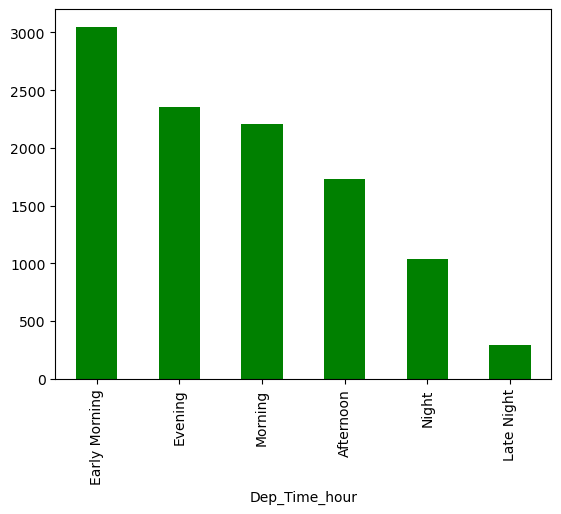

In [25]:
df['Dep_Time_hour'].apply(time_of_day).value_counts().plot(kind='bar',color='g')

In [26]:
# to make the charts interactive we use plotly
#!pip install plotly
#!pip install chart_studio
#!pip install cufflinks

In [27]:
import plotly
import cufflinks as cf
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [28]:
df['Dep_Time_hour'].apply(time_of_day).value_counts().iplot(kind='bar')

Till now we :
1. Uses the departure time to analyze at which time of the day the flight mostly take off and got the result that in early morning most of the flights take off.

In [29]:
#now make duration column preprocessed for the future model training
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [30]:
#now breaking down the hour minute before that we have to ensure all the rows contains hours and minute
def func(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return  x
    

In [31]:
df['Duration']=df['Duration'].apply(func)

In [32]:
df['Duration_hours']=df['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [33]:
df['Duration_minutes']=df['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [34]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


Till now we:
1. Make the duration column preprocess for model training by splitting into hours and minutes.

In [35]:
#now finding the relationship between duration and price
df['Duration_totalmins']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

<Axes: xlabel='Duration_totalmins', ylabel='Price'>

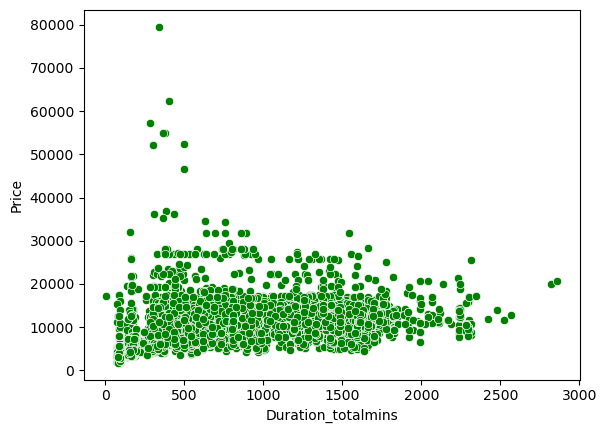

In [36]:
import seaborn as sns
sns.scatterplot(x='Duration_totalmins',y='Price',data=df,color='g')

<Axes: xlabel='Duration_totalmins', ylabel='Price'>

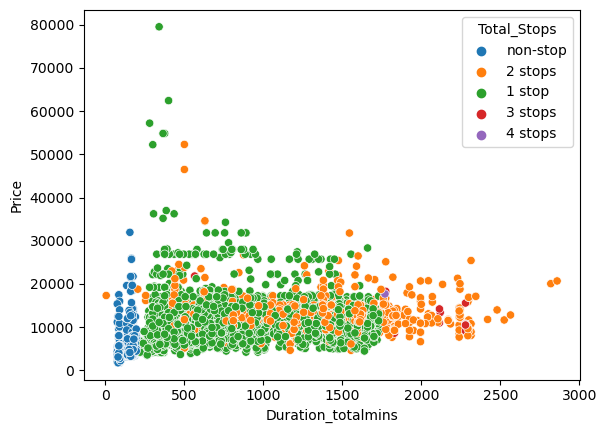

In [37]:
sns.scatterplot(x='Duration_totalmins',y='Price',hue='Total_Stops',data=df,color='g')

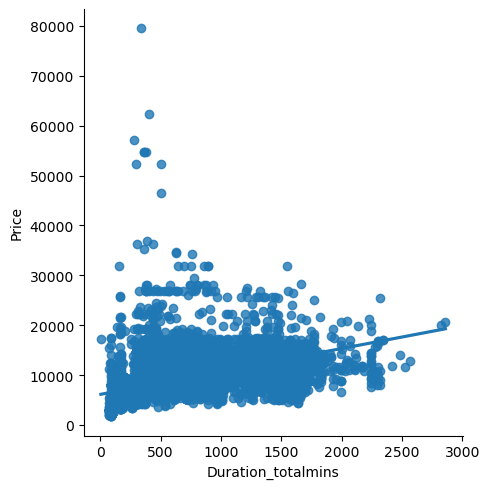

In [38]:
sns.lmplot(x='Duration_totalmins',y='Price',data=df)

Till now we get:
1. The price increases as we increase the duration of the flight.

In [39]:
#to find how much jetways flight takes off from which route maximum
df[df['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [40]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

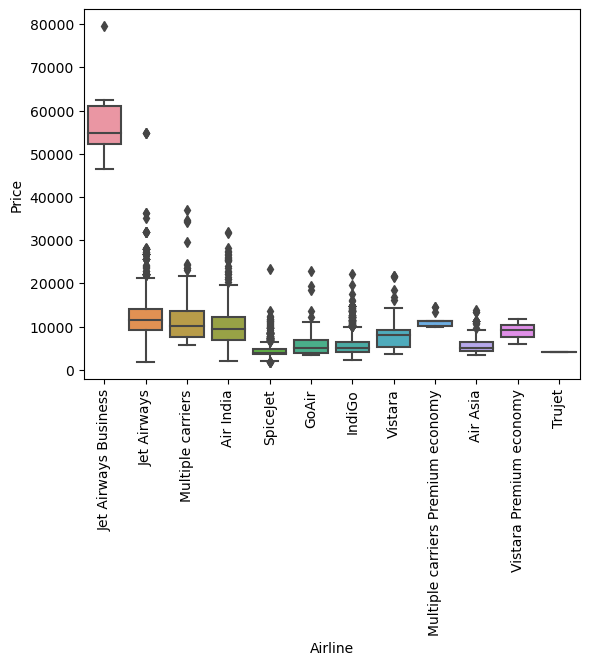

In [41]:
import matplotlib.pyplot as plt
sns.boxplot(y='Price',x='Airline',data=df.sort_values("Price",ascending=False))
plt.xticks(rotation="vertical")
plt.show()

Till now we:
1. find how much jetways flight takes off from which route maximum.
2. Boxplot is  plotted between price and airline and it is found that it contains outliers.

In [42]:
#one hot encoding we use in nominal data
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'day', 'month',
       'year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes',
       'Duration_totalmins'],
      dtype='object')

In [43]:
#first let separate categorical and numerical data
cat_data=[col for col in df.columns if(df[col].dtypes == "object")]
cat_data

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [44]:
num_data=[col for col in df.columns if(df[col].dtypes != "object")]
num_data

['Date_of_Journey',
 'Price',
 'day',
 'month',
 'year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes',
 'Duration_totalmins']

In [45]:
#convertinng source
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [46]:
for sub_cat in data['Source'].unique():
    df['Source_'+sub_cat]=data['Source'].apply(lambda x: 1 if x==sub_cat else 0)

In [47]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_totalmins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


Till now we:
1. Uses source (nominal data) to convert it into binary forms using one hot encoding.

In [48]:
#now for airlines and destination let's use target encoding
cat_data

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [49]:
df['Airline'].nunique()

12

In [50]:
airlines=df.groupby('Airline')['Price'].mean().sort_values().index

In [51]:
dict_airlines={key:index for index,key in enumerate(airlines,0)} 

In [52]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [53]:
df['Airline']=df['Airline'].map(dict_airlines)

In [54]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_totalmins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [55]:
#now for destination
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [56]:
#new delhi and delhi are same so replacing
df['Destination'].replace("New Delhi","Delhi",inplace= True)

In [57]:
df['Destination'].nunique()

5

In [58]:
dest=df.groupby('Destination')['Price'].mean().sort_values().index

In [59]:
dict_dest={key:index for index,key in enumerate(dest,0)}

In [60]:
df['Destination']=df['Destination'].map(dict_dest)

In [61]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_totalmins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


Till now  we:
1. Convert Airline and Destination features into numerical features by usinng target guided encoding.

In [62]:
cat_data

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [63]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
dict_stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [65]:
df['Total_Stops']=df['Total_Stops'].map(dict_stops)

Till now we:
1. uses label encoding feature for total_stops feature

In [66]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'day', 'month',
       'year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes',
       'Duration_totalmins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [67]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_totalmins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [68]:
df['Additional_Info'].value_counts()/len(df)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: count, dtype: float64

In [69]:
df['year'].value_counts()

year
2019    10682
Name: count, dtype: int64

In [70]:
df.drop(columns=['Route','Duration','Source','Additional_Info','year','Duration_totalmins','Date_of_Journey'],inplace=True)

In [71]:
df.head(3)

,Airline,Destination,Total_Stops,Price,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [72]:
df.shape

(10682, 17)

Till now we:
1. Drop some columns which are:
        - Route, because total stops also mentions the same  thing.
        - Duration, because duration hours and minutes is present in dataset.
        - Source, because it is encoded  before.
        - Additional info, as 78% data is no info as present no relevancy in the dataset for model training.
        - Year, as all value is 2019 which is constant and can not change the results.
        - duration total mins, as duration mins and hour is present. 
        - date of journey, as we categorized as day and month before

In [73]:
#outliers in  data
def plot(df,col):
    fig,[axis1,axis2,axis3]=plt.subplots(3,1)
    sns.distplot(df[col],ax=axis1)
    sns.distplot(df[col],kde=False,ax=axis2)
    sns.boxplot(df[col],ax=axis3)
    

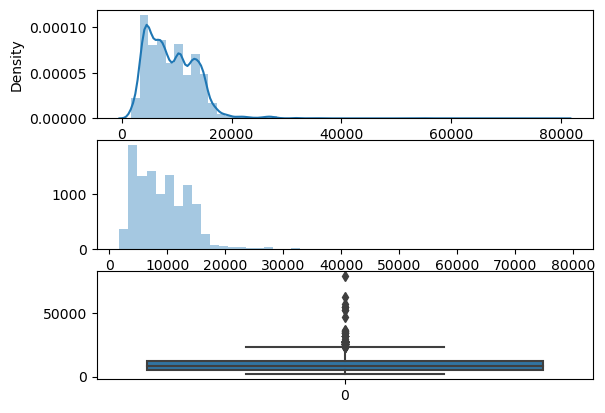

In [74]:
plot(df,'Price')

Till now we:
1. Plot the density,histogram and boxplot and find that it has outliers.

In [75]:
#let's find iqr

q1= df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)

iqr=q3-q1

maximum=iqr*1.5+q3
minimum=q1-1.5*iqr

print(maximum)
print(minimum)

23017.0
-5367.0


In [76]:
len([price for price in df['Price'] if price>maximum or price<minimum])

94

In [77]:
import numpy as np
df['Price']=np.where(df['Price']>=maximum,df['Price'].median(),df['Price'])
df['Price']=np.where(df['Price']<=minimum,df['Price'].median(),df['Price'])

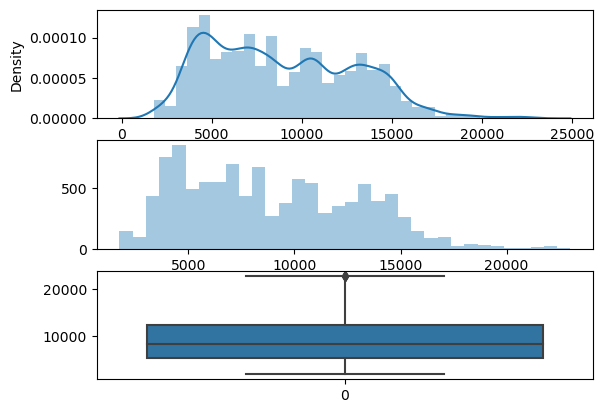

In [78]:
plot(df,'Price')

Till now we:
1. Find minimum and maximum using iqr and then replace the outliers value by the median of price.

In [79]:
y=df['Price']
x=df.drop('Price',axis=1)

In [80]:
x.head()

,Airline,Destination,Total_Stops,day,month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,1,3,16,50,21,35,4,45,1,0,0,0,0


In [81]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [82]:
#mutual information
from sklearn.feature_selection import mutual_info_regression

In [83]:
info=mutual_info_regression(x,y)

In [84]:
info_df=pd.DataFrame(info,index=x.columns)

In [85]:
info_df.columns=['Importance']

In [86]:
info_df.sort_values(by='Importance',ascending=False)

,Importance
Destination,0.995479
Airline,0.969433
Total_Stops,0.783610
month,0.627927
Source_Delhi,0.517449
Duration_hours,0.467560
Source_Kolkata,0.461842
Arrival_Time_hour,0.404466
Source_Banglore,0.374288
Arrival_Time_minute,0.343294


Till now we:
1. Uses scikit learn feature selection mutual information and got that destination is highly dependent on price.

# Training Models

In [87]:
#test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [88]:
x_train.shape

(8011, 16)

In [89]:
x_test.shape

(2671, 16)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
#function for the comparison of different models
def compare(model):
    y_pred=model.predict(x_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
 
    # Print the evaluation metrics
   
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r_squared)
    print("Root Mean Squared Error (RMSE):", rmse)
    sns.displot(y_test-y_pred)

Accuracy 6075    400995.957814
3544   -309109.115135
9291     28635.274401
5032    -28992.296176
2483    178734.799399
            ...      
3022    233990.191134
8416    -87515.167709
2605     -3683.976561
1392   -343628.536389
8535    -84626.136644
Name: Price, Length: 2671, dtype: float64
Mean Absolute Error (MAE): 1871.1849032154614
Mean Squared Error (MSE): 6367697.161641553
R-squared (R²): 0.607721118064921
Root Mean Squared Error (RMSE): 2523.4296426969295


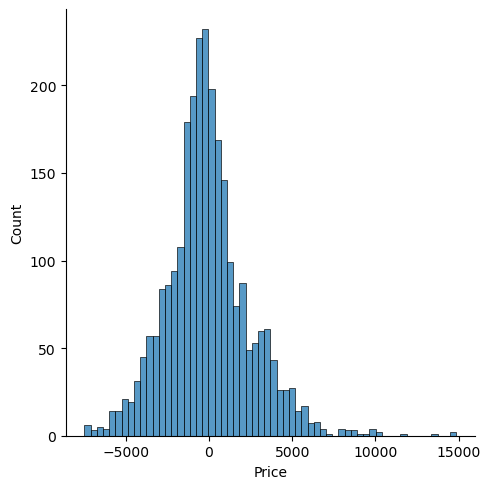

In [107]:
#linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(x_train,y_train)
compare(lr)


Mean Absolute Error (MAE): 1660.733433171097
Mean Squared Error (MSE): 5751538.550496069
R-squared (R²): 0.6456792691734312
Root Mean Squared Error (RMSE): 2398.2365501543145


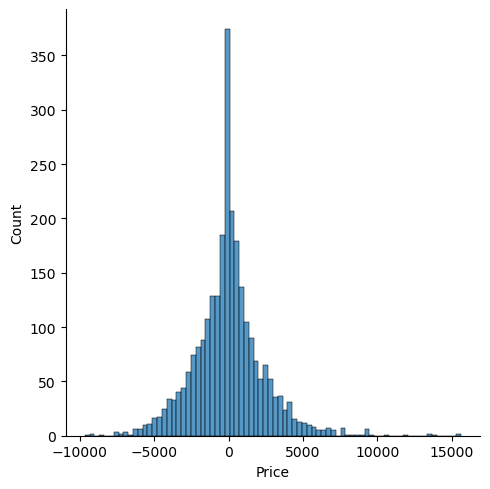

In [93]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4).fit(x_train,y_train)
compare(knn)

Mean Absolute Error (MAE): 3298.219395311974
Mean Squared Error (MSE): 15809950.967325745
R-squared (R²): 0.02603567169137322
Root Mean Squared Error (RMSE): 3976.172904606356


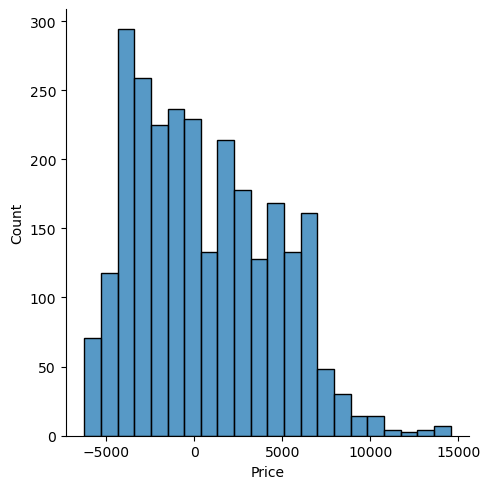

In [94]:
#SVM
from sklearn.svm import SVR
svm=SVR().fit(x_train,y_train)
compare(svm)

Mean Absolute Error (MAE): 1376.036284787221
Mean Squared Error (MSE): 5636265.484958713
R-squared (R²): 0.6527806102263034
Root Mean Squared Error (RMSE): 2374.0820299557286


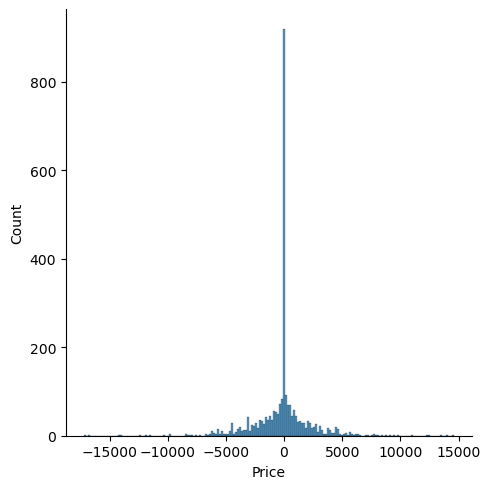

In [95]:
#decision TRee
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor().fit(x_train,y_train)
compare(dt)

Mean Absolute Error (MAE): 1163.9098580623586
Mean Squared Error (MSE): 3333436.6561255134
R-squared (R²): 0.7946452585177238
Root Mean Squared Error (RMSE): 1825.7701542432753


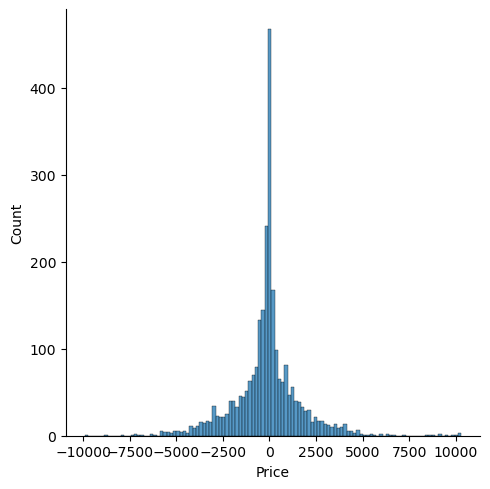

In [96]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x_train,y_train)
compare(rf)

Till now we:
1. Compare regresssion models.
2. Found that random forest regressor is the best as it have low mse and high r square values.

In [98]:
#hypertuning random forest regresssor
from sklearn.model_selection import RandomizedSearchCV

In [99]:
rf=RandomForestRegressor()

In [100]:
import numpy as np
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features= ['auto','sqrt']
max_depth= [int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,20]

In [101]:
random_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [102]:
rg=RandomizedSearchCV(rf,random_grid, verbose=2, cv=3, n_jobs=-1)

In [103]:
rg.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [104]:
rg.best_params_


{'n_estimators': 100,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [105]:
rg.best_score_

0.8024617499991136

In [109]:
model=rg.best_estimator_

In [110]:
model

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_split=15)

In [116]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

Till now we:
1. Find best hyper parameters using RandomizedSearchCV and found that the accuracy of the model is increased by tuning hyper parameters.